# **Task 1: Data Exploration and Preprocessing**

**Load Dataset**

In [ ]:
from google.colab import files
uploaded= files.upload()
print(uploaded)

Saving Dataset .csv to Dataset .csv
{'Dataset .csv': b'\xef\xbb\xbfRestaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes\n6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314\n6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591\n6300002,Hea

 **Check Shape of dataset**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset .csv"  # Update path if needed
df = pd.read_csv(file_path)

# Check number of rows and columns
print("Shape of the dataset:", df.shape)
print("\nPreview of data:\n")
print(df.head())


Shape of the dataset: (9551, 21)

Preview of data:

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa

**Check for Missing Values**

In [ ]:
# Check for missing values in each column
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Handle Missing Values**

In [ ]:
# Fill missing 'Cuisines' with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

# Verify no missing values remain
print("\nTotal missing values after handling:", df.isnull().sum().sum())



Total missing values after handling: 0


/tmp/ipython-input-8-652516990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


**Check and Convert Data Types**

In [ ]:
# Display current data types
print("\nData types before conversion:\n")
print(df.dtypes)

# Convert relevant columns
df['Price range'] = df['Price range'].astype(int)
df['Aggregate rating'] = df['Aggregate rating'].astype(float)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # convert non-numeric to NaN if any

print("\nData types after conversion:\n")
print(df.dtypes)



Data types before conversion:

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Data types after conversion:

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               flo

**Analyze Distribution of Target Variable ("Aggregate rating")**

/tmp/ipython-input-10-1202924203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=df, palette='viridis')


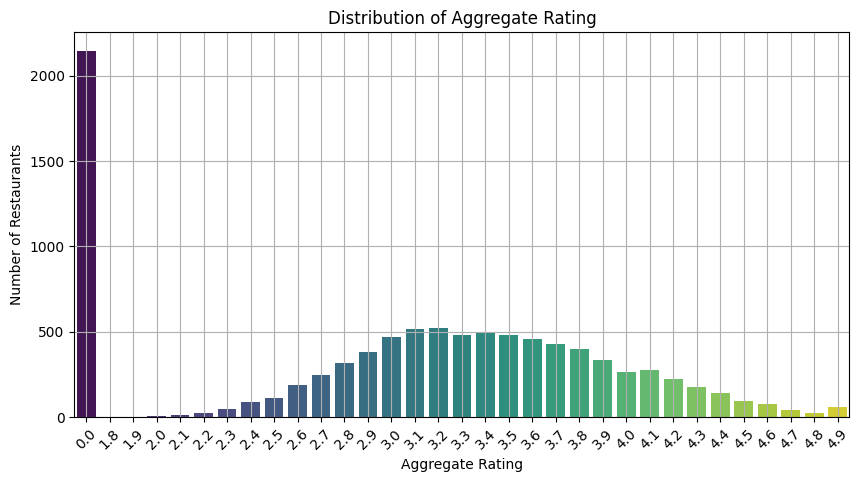


Value counts of Aggregate rating:

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of Aggregate rating
plt.figure(figsize=(10,5))
sns.countplot(x='Aggregate rating', data=df, palette='viridis')
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print value counts
print("\nValue counts of Aggregate rating:\n")
print(df['Aggregate rating'].value_counts())


**Check Class Imbalance**

In [ ]:
# Plot percentage distribution
rating_counts = df['Aggregate rating'].value_counts(normalize=True) * 100
print("\nClass distribution (in %):\n")
print(rating_counts.sort_index())



Class distribution (in %):

Aggregate rating
0.0    22.489792
1.8     0.010470
1.9     0.020940
2.0     0.073291
2.1     0.157052
2.2     0.282693
2.3     0.492095
2.4     0.910899
2.5     1.151712
2.6     1.999791
2.7     2.617527
2.8     3.298084
2.9     3.989111
3.0     4.900010
3.1     5.433986
3.2     5.465396
3.3     5.057062
3.4     5.214114
3.5     5.025652
3.6     4.795309
3.7     4.470736
3.8     4.188043
3.9     3.507486
4.0     2.785049
4.1     2.868810
4.2     2.313894
4.3     1.821799
4.4     1.507696
4.5     0.994660
4.6     0.816668
4.7     0.439745
4.8     0.261753
4.9     0.638677
Name: proportion, dtype: float64


# **Descriptive Analysis**

**Calculate Basic Statistical Measures (Numerical Columns)bold text**

In [ ]:
# Display statistical summary for numerical columns
print("Descriptive Statistics for Numerical Columns:\n")
print(df.describe())

Descriptive Statistics for Numerical Columns:

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
2

**Explore Distribution of Categorical Variables**

***A. Country Code***


Country Code Distribution:

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


/tmp/ipython-input-13-1932885654.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country Code', order=df['Country Code'].value_counts().index, palette='mako')


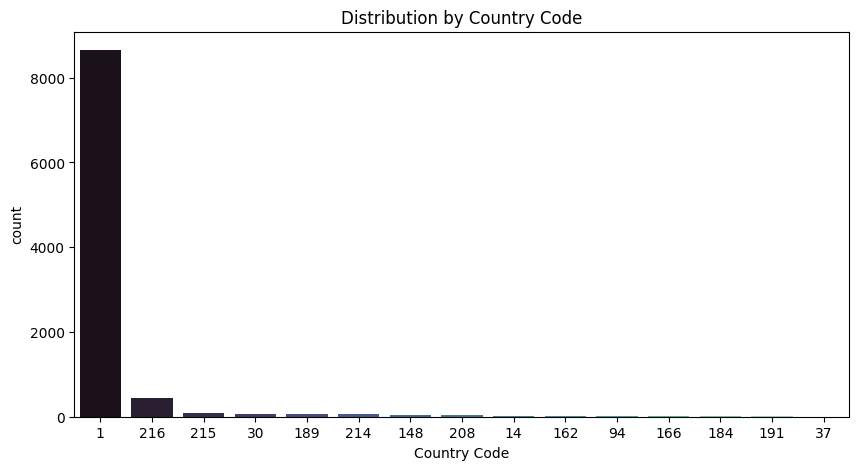

In [ ]:
# Distribution of Country Code
print("\nCountry Code Distribution:\n")
print(df['Country Code'].value_counts())

# Optional: Visualize
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Country Code', order=df['Country Code'].value_counts().index, palette='mako')
plt.title("Distribution by Country Code")
plt.show()

***B. City***


Top 10 Cities by Number of Restaurants:

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


/tmp/ipython-input-14-1166673587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df, order=df['City'].value_counts().head(10).index, palette='crest')


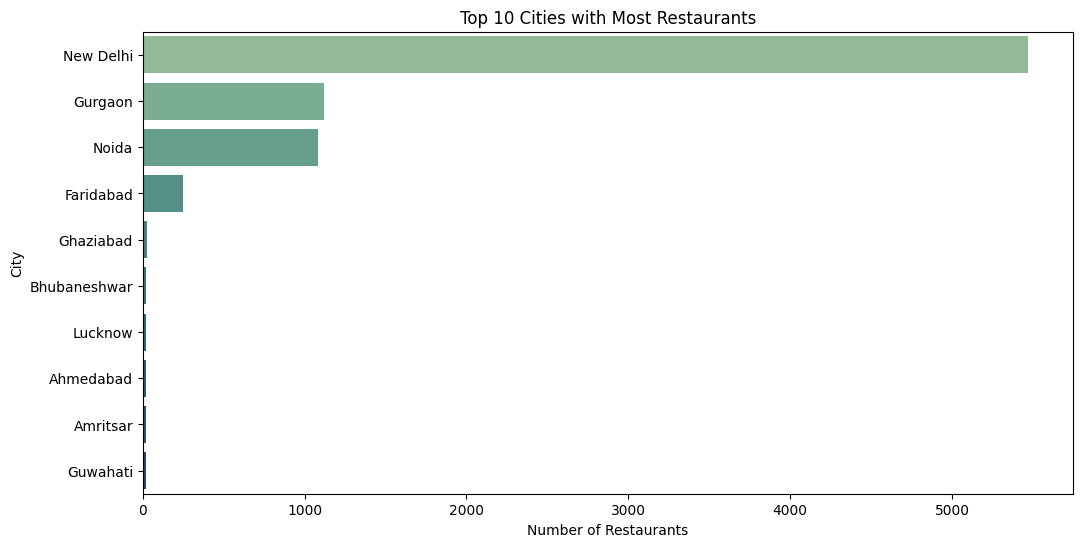

In [ ]:
# Top 10 cities by count
print("\nTop 10 Cities by Number of Restaurants:\n")
print(df['City'].value_counts().head(10))

# Optional: Visualize
plt.figure(figsize=(12,6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().head(10).index, palette='crest')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

***C. Cuisines***


Top 10 Most Common Cuisines:

Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


/tmp/ipython-input-15-2384107026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='flare')


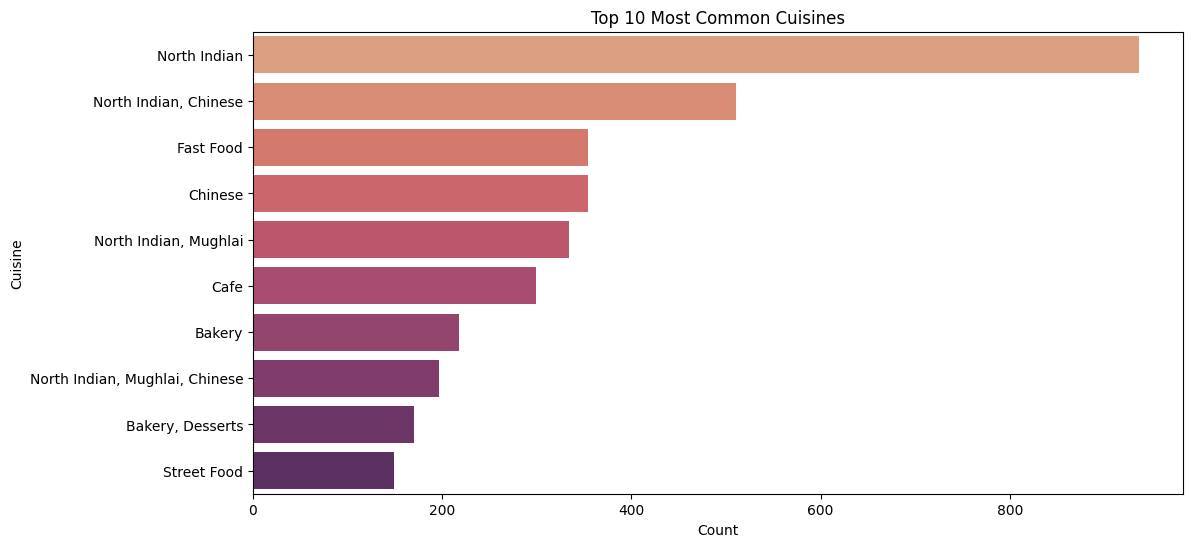

In [ ]:
# Top 10 cuisines
print("\nTop 10 Most Common Cuisines:\n")
top_cuisines = df['Cuisines'].value_counts().head(10)
print(top_cuisines)

# Optional: Visualize
plt.figure(figsize=(12,6))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='flare')
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

**Identify Cities and Cuisines with Highest Number of Restaurants**

In [ ]:
# City with highest number of restaurants
most_restaurants_city = df['City'].value_counts().idxmax()
print(f"\nCity with the highest number of restaurants: {most_restaurants_city}")

# Cuisine with highest number of listings
most_common_cuisine = df['Cuisines'].value_counts().idxmax()
print(f"Cuisine with the highest number of listings: {most_common_cuisine}")


City with the highest number of restaurants: New Delhi
Cuisine with the highest number of listings: North Indian


# **Task 3: Geospatial Analysis**

**Visualize Locations of Restaurants (Latitude & Longitude)**

scatter plot

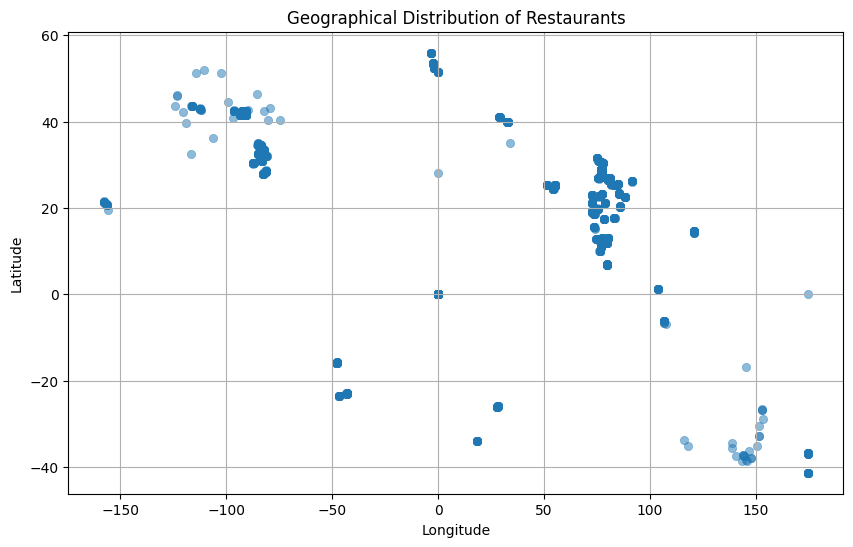

In [ ]:
# Plot restaurant locations
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5, edgecolor=None)
plt.title("Geographical Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Interactive map plotting, use Plotly

In [ ]:
# Plotly for interactive map
!pip install plotly

import plotly.express as px

# Interactive map of restaurant locations
fig = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Restaurant Name',
                     color='Aggregate rating',
                     title='Restaurant Locations Colored by Rating',
                     color_continuous_scale='Viridis')

fig.update_layout(geo=dict(showland=True, landcolor='lightgray'))
fig.show()


**Distribution of Restaurants by Country or City**

***A. By Country***

/tmp/ipython-input-19-869145697.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




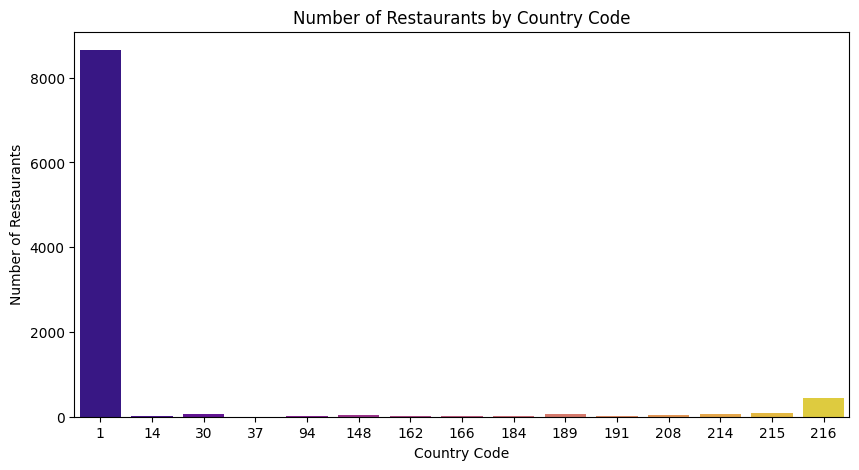

In [ ]:
# Restaurants per country
country_counts = df['Country Code'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='plasma')
plt.title("Number of Restaurants by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.show()

***B. By City (Top 10)***

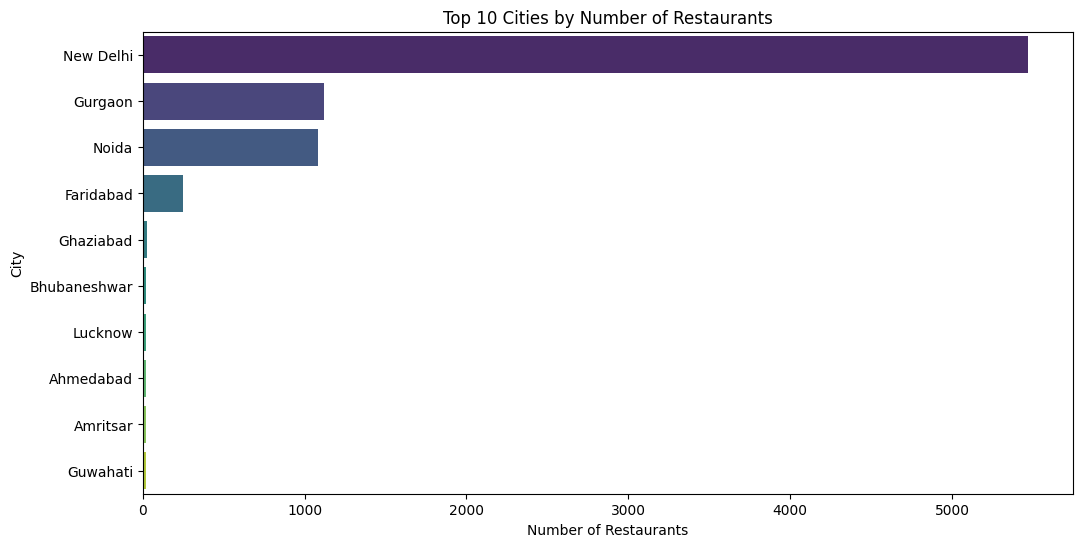

In [ ]:
# Top 10 cities
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

**Correlation Between Location and Rating**

explore whether rating has any geographic trend (e.g., clustered in certain regions):

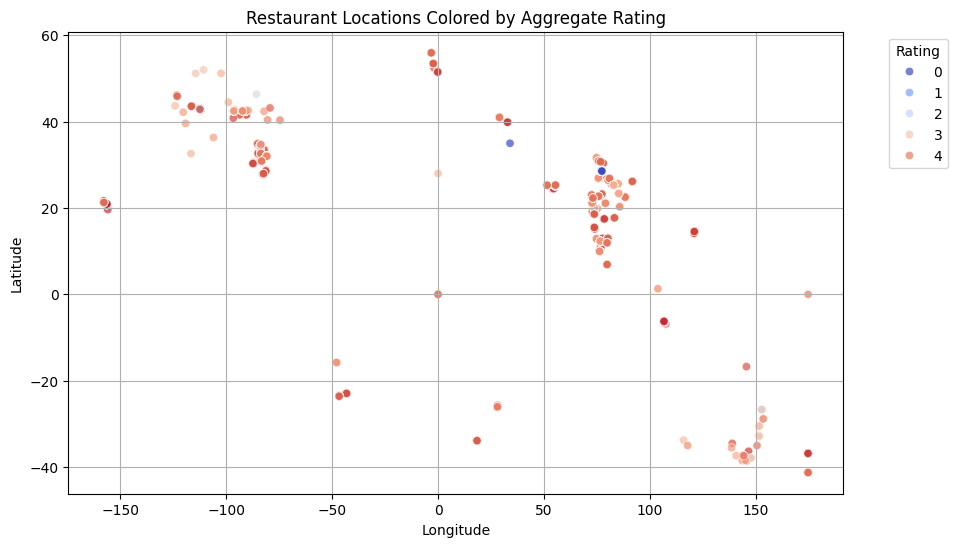

In [ ]:
# Heatmap-style scatter by rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', alpha=0.7)
plt.title("Restaurant Locations Colored by Aggregate Rating")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Correlation check numerically between location and rating:

In [ ]:
# Correlation matrix
corr_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation Matrix:\n")
print(corr_matrix)

Correlation Matrix:

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000
